In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# each point is length, width , type (0,1)
data = [[3,1.5,1],
       [2,1,0],
       [4,1.5,1],
       [3,1,0],
       [3.5,0.5,1],
       [2,0.5,0],
       [5.5,1,1],
       [1,1,0]]
mystery_flower = [4.5,1]

In [4]:
data[0]

[3, 1.5, 1]

In [5]:
data[1]

[2, 1, 0]

In [41]:
# network

#       o     flower type
#     /  \    w1, w2, b 
#    o   o    length, width


In [42]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [43]:
T = np.linspace (-20,20,100)

In [44]:
T

array([-20.        , -19.5959596 , -19.19191919, -18.78787879,
       -18.38383838, -17.97979798, -17.57575758, -17.17171717,
       -16.76767677, -16.36363636, -15.95959596, -15.55555556,
       -15.15151515, -14.74747475, -14.34343434, -13.93939394,
       -13.53535354, -13.13131313, -12.72727273, -12.32323232,
       -11.91919192, -11.51515152, -11.11111111, -10.70707071,
       -10.3030303 ,  -9.8989899 ,  -9.49494949,  -9.09090909,
        -8.68686869,  -8.28282828,  -7.87878788,  -7.47474747,
        -7.07070707,  -6.66666667,  -6.26262626,  -5.85858586,
        -5.45454545,  -5.05050505,  -4.64646465,  -4.24242424,
        -3.83838384,  -3.43434343,  -3.03030303,  -2.62626263,
        -2.22222222,  -1.81818182,  -1.41414141,  -1.01010101,
        -0.60606061,  -0.2020202 ,   0.2020202 ,   0.60606061,
         1.01010101,   1.41414141,   1.81818182,   2.22222222,
         2.62626263,   3.03030303,   3.43434343,   3.83838384,
         4.24242424,   4.64646465,   5.05050505,   5.45

In [45]:
Y = sigmoid(T)

In [22]:
Y

array([2.06115362e-09, 3.08732876e-09, 4.62440004e-09, 6.92672447e-09,
       1.03752944e-08, 1.55407847e-08, 2.32779890e-08, 3.48672722e-08,
       5.22264472e-08, 7.82281373e-08, 1.17175143e-07, 1.75512472e-07,
       2.62893872e-07, 3.93779338e-07, 5.89827961e-07, 8.83482085e-07,
       1.32333584e-06, 1.98217642e-06, 2.96902870e-06, 4.44719601e-06,
       6.66128213e-06, 9.97766470e-06, 1.49451152e-05, 2.23855904e-05,
       3.35302067e-05, 5.02228667e-05, 7.52251664e-05, 1.12672884e-04,
       1.68759242e-04, 2.52757236e-04, 3.78548446e-04, 5.66907423e-04,
       8.48910885e-04, 1.27101626e-03, 1.90260614e-03, 2.84714919e-03,
       4.25860705e-03, 6.36532037e-03, 9.50426753e-03, 1.41690589e-02,
       2.10746635e-02, 3.12392175e-02, 4.60755062e-02, 6.74672091e-02,
       9.77725999e-02, 1.39652183e-01, 1.95581668e-01, 2.66960083e-01,
       3.52958350e-01, 4.49666020e-01, 5.50333980e-01, 6.47041650e-01,
       7.33039917e-01, 8.04418332e-01, 8.60347817e-01, 9.02227400e-01,
      

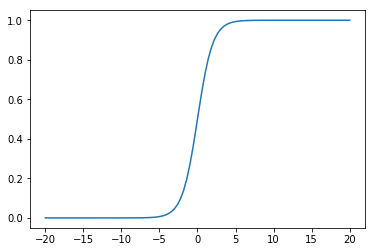

In [46]:
plt.plot(T,Y)

In [47]:
# drivative of sigmoid function, p = prime
def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

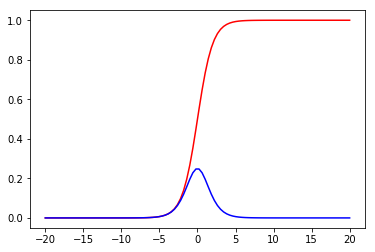

In [48]:
plt.plot(T,sigmoid(T), c = 'r')
plt.plot(T,sigmoid_p(T), c = 'b')

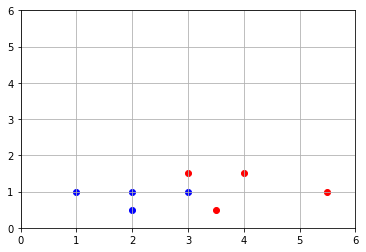

In [49]:
# scatter data
plt.axis([0,6,0,6])
plt.grid()
for i in range(len(data)):
    point = data[i]
    color = 'r'
    if point[2] == 0:
        color = "b"
    plt.scatter(point[0],point[1], c=color)

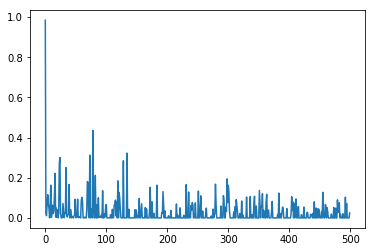

In [52]:
# training loop

learning_rate = 0.2
costs = []

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

for i in range(50000):
    ri = np.random.randint(len(data))
    point = data[ri]
    
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    
    target = point[2]
    cost = np.square(pred - target)
    
    dcost_pred = 2 * (pred - target)
    dpred_dz = sigmoid_p(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1
    
    dcost_dz = dcost_pred * dpred_dz
    
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db
    
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db
    
    if i % 100 == 0:
        cost_sum = 0
        for j in range(len(data)):
            point = data[ri]
            
            z = point[0] * w1 + point[1] * w2 + b
            pred = sigmoid(z)
            
            target = point[2]
            cost_sum += np.square(pred - target)
        
        costs.append(cost_sum/len(data))
    
plt.plot(costs)
    

In [53]:
# predict what the myster flower is!

z = w1 * mystery_flower[0] + w2 * mystery_flower[1] + b
pred = sigmoid(z)

print(pred)
print("close to 0 -> blue, close to 1 -> red")

0.9999129995600006
close to 0 -> blue, close to 1 -> red


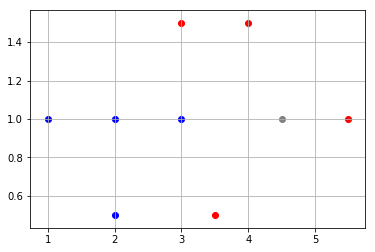

In [55]:
# scatter plot them
def vis_data():
    plt.grid()

    for i in range(len(data)):
        c = 'r'
        if data[i][2] == 0:
            c = 'b'
        plt.scatter([data[i][0]], [data[i][1]], c=c)

    plt.scatter([mystery_flower[0]], [mystery_flower[1]], c='gray')

vis_data()

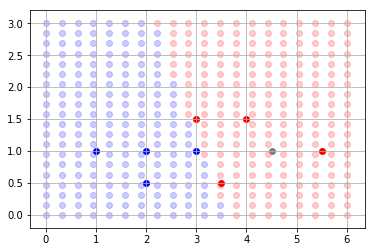

In [56]:
# check out the networks predictions in the x,y plane
for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)
        
# plot points over network predictions
# you should see a split, with half the predictions blue
# and the other half red.. nicely predicting each data point!
vis_data()